<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/Network_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMEANS CLUSTERING
1.   Load and Plot the dataset.
2.   Pre-process data as necessary.
3.   Apply Clustering technique, K-Mean.
4.   Share the findings along with a report.


In [40]:
# Importing necessary modules which come installed in Google Collab.
import numpy as np # basic maths
import pandas as pd # for dataframe + python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # data visulization with steriods.
# we will be importing other necessary modules and ++ here as we move one

In [41]:
# current datasets doesnot include header meaning columns labelling so we will import from assessment description Project1 https://courses.highered.tafensw.edu.au/mod/folder/view.php?id=982495
columns_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",

"wrong_fragment","urgent","hot","num_failed_logins","logged_in",

"num_compromised","root_shell","su_attempted","num_root","num_file_creations",

"num_shells","num_access_files","num_outbound_cmds","is_host_login",

"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",

"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",

"dst_host_diff_srv_rate","dst_host_same_src_port_rate",

"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",

"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df = pd.read_csv("Network_Anomaly.csv", header=None, names=columns_names) # header reads the rows for columns names and names overrides if we define own columns names

# EXPLORATORY DATA ANALYSIS

In [42]:
# df
df.info()
# We have three diff datatypes
# types: float64(15), int64(24), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [43]:
df.shape
# we can see in the info that there are no null values thats a plus point.


(125973, 43)

In [44]:
# lets see the description analysis of overall data
df.describe() # returns 39 columns as they are all numeric excluding 4 that are objects attack, flag, service, protocol_type

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,...,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000
mean,287.14465004,45566.74300048,19779.11442134,0.00019846,0.02268740,0.00011113,0.20440888,0.00122248,0.39573559,0.27925032,...,115.65300501,0.52124169,0.08295111,0.14837886,0.03254245,0.28445246,0.27848452,0.11883181,0.12023989,19.50406039
std,2604.51530987,5870331.18189133,4021269.15143965,0.01408607,0.25352999,0.01436603,2.14996843,0.04523914,0.48901005,23.94204224,...,110.70274078,0.44894936,0.18892180,0.30899713,0.11256380,0.44478405,0.44566912,0.30655746,0.31945939,2.29150294
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,10.00000000,0.05000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,18.00000000
50%,0.00000000,44.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,63.00000000,0.51000000,0.02000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20.00000000
75%,0.00000000,276.00000000,516.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,...,255.00000000,1.00000000,0.07000000,0.06000000,0.02000000,1.00000000,1.00000000,0.00000000,0.00000000,21.00000000
max,42908.00000000,1379963888.00000000,1309937401.00000000,1.00000000,3.00000000,3.00000000,77.00000000,5.00000000,1.00000000,7479.00000000,...,255.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,21.00000000


In [45]:
#lets check is there is any inconsistency in the count of data
pd.options.display.float_format = '{:.8f}'.format
df.describe()
# things to be mentioned each features are scaled differently where some values are in scale of 42908 while some are 1 , 5, 0.5.
# needs to be scaled or normalized for model algorithms to treat them better and not skew the model too much


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,...,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000,125973.00000000
mean,287.14465004,45566.74300048,19779.11442134,0.00019846,0.02268740,0.00011113,0.20440888,0.00122248,0.39573559,0.27925032,...,115.65300501,0.52124169,0.08295111,0.14837886,0.03254245,0.28445246,0.27848452,0.11883181,0.12023989,19.50406039
std,2604.51530987,5870331.18189133,4021269.15143965,0.01408607,0.25352999,0.01436603,2.14996843,0.04523914,0.48901005,23.94204224,...,110.70274078,0.44894936,0.18892180,0.30899713,0.11256380,0.44478405,0.44566912,0.30655746,0.31945939,2.29150294
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,10.00000000,0.05000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,18.00000000
50%,0.00000000,44.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,63.00000000,0.51000000,0.02000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20.00000000
75%,0.00000000,276.00000000,516.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,...,255.00000000,1.00000000,0.07000000,0.06000000,0.02000000,1.00000000,1.00000000,0.00000000,0.00000000,21.00000000
max,42908.00000000,1379963888.00000000,1309937401.00000000,1.00000000,3.00000000,3.00000000,77.00000000,5.00000000,1.00000000,7479.00000000,...,255.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,21.00000000


In [46]:
# lets peek the objects data
df['attack'].value_counts() # has multiple variable needs mapping normal as 0 and rest all as 1 for binomial classification
df['protocol_type'].value_counts() # has three types tcp,udp,icmp needs to be mapped hot coded 1,2,3 # if necessary
df['service'].value_counts() # has 7 unique services to list few http, private ..
df['flag'].value_counts() # flags has 11 types of unique data

,count
flag,
SF,74945
S0,34851
REJ,11233
RSTR,2421
RSTO,1562
S1,365
SH,271
S2,127
RSTOS0,103


The attack varaible consists of more than two types we will label normal as 0 and rest as 1 for Binary Classification (Normal and Attack )

In [10]:
df.describe(include='object')
# we can see the overall high level view of the datatypes objects

,protocol_type,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [47]:
# lets explore some plots bewtween features and lets label those by classes attack we will color normal as one color and rest all grouped as another color
# we have imported all necessary modules in first cell but still for modularity sake lets import again
import seaborn as sns
import matplotlib.pyplot as plt

df['attack_group'] = df['attack'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

/tmp/ipython-input-400265231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_counts, x='attack_group', y='count', palette={'normal': 'blue', 'attack': 'red'})


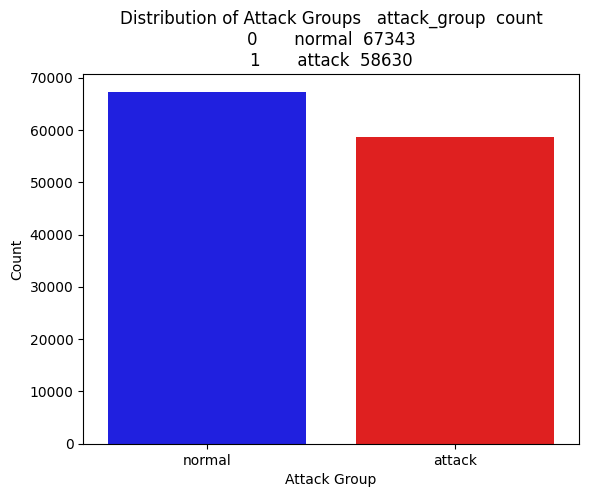

In [48]:
# a better way to know our dataset spread and if we have a balanced dataset or not
attack_counts = df['attack_group'].value_counts().reset_index()
attack_counts.columns = ['attack_group', 'count']

# lets visulaize it shall we?
sns.barplot(data=attack_counts, x='attack_group', y='count', palette={'normal': 'blue', 'attack': 'red'})
distribution_count_attack = df['attack_group'].value_counts().reset_index()
plt.title(f'Distribution of Attack Groups {distribution_count_attack}')
plt.xlabel('Attack Group')
plt.ylabel('Count')
plt.show()



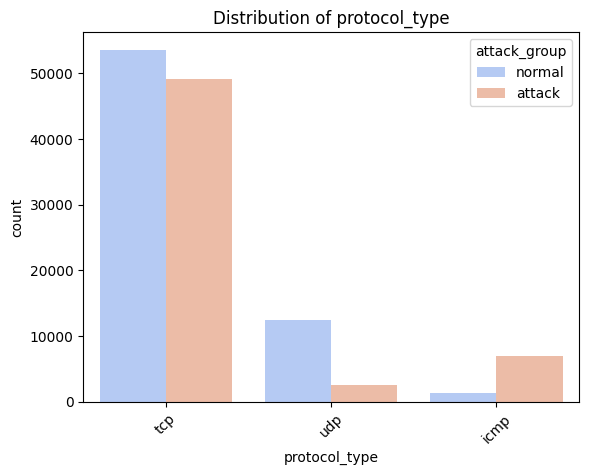

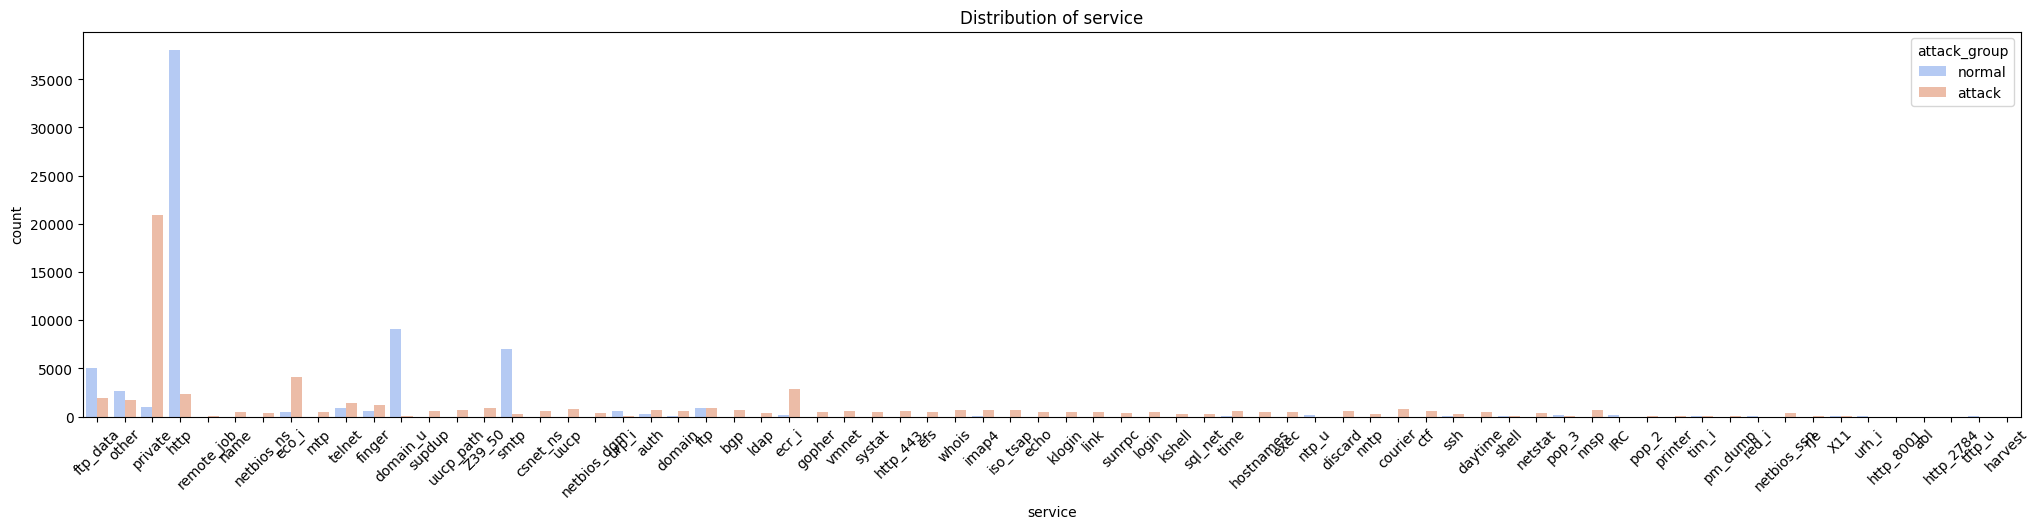

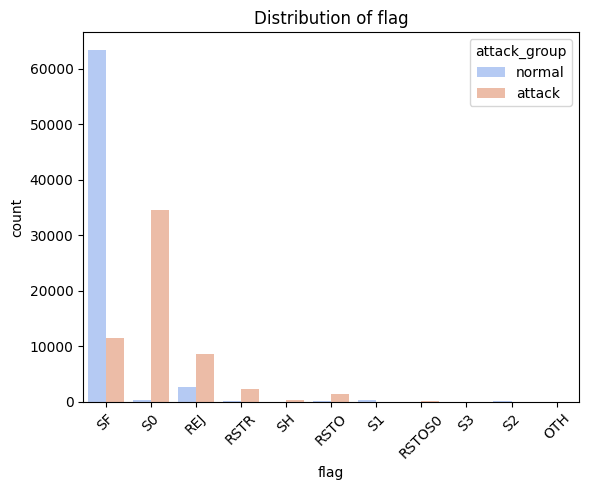

In [49]:
# categorical columns
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=df, hue='attack_group', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
# sanity check
df.dropna(inplace=True)

print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [51]:
# we have categorical data so we will introduce label encoding
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(df)

df.head()

# categorical data are turned in a labell encoding

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_group
0,0,1,20,9,491,0,0,0,0,0,...,0.03000000,0.17000000,0.00000000,0.00000000,0.00000000,0.05000000,0.00000000,11,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60000000,0.88000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,11,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00000000,0.03000000,0.04000000,0.03000000,0.01000000,0.00000000,0.01000000,11,21,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,11,21,1


Currently its shape is n rows x 44 columns that includes the "attack", "last_flag" , "attack_group" which we dont need for unsupervised CLUSTERING.

CORRELATIONS

In [52]:
# WE ARE SEPERATIONG TRAIN SET ( NO Y DEPENDENT VARIABLE) AND TEST SET (ONLY THE DEPENDENT VARIABLE)
dependent_columns = ['attack','last_flag','attack_group']
df_x = df.drop(columns=dependent_columns).copy()
df_y = df[dependent_columns].copy()

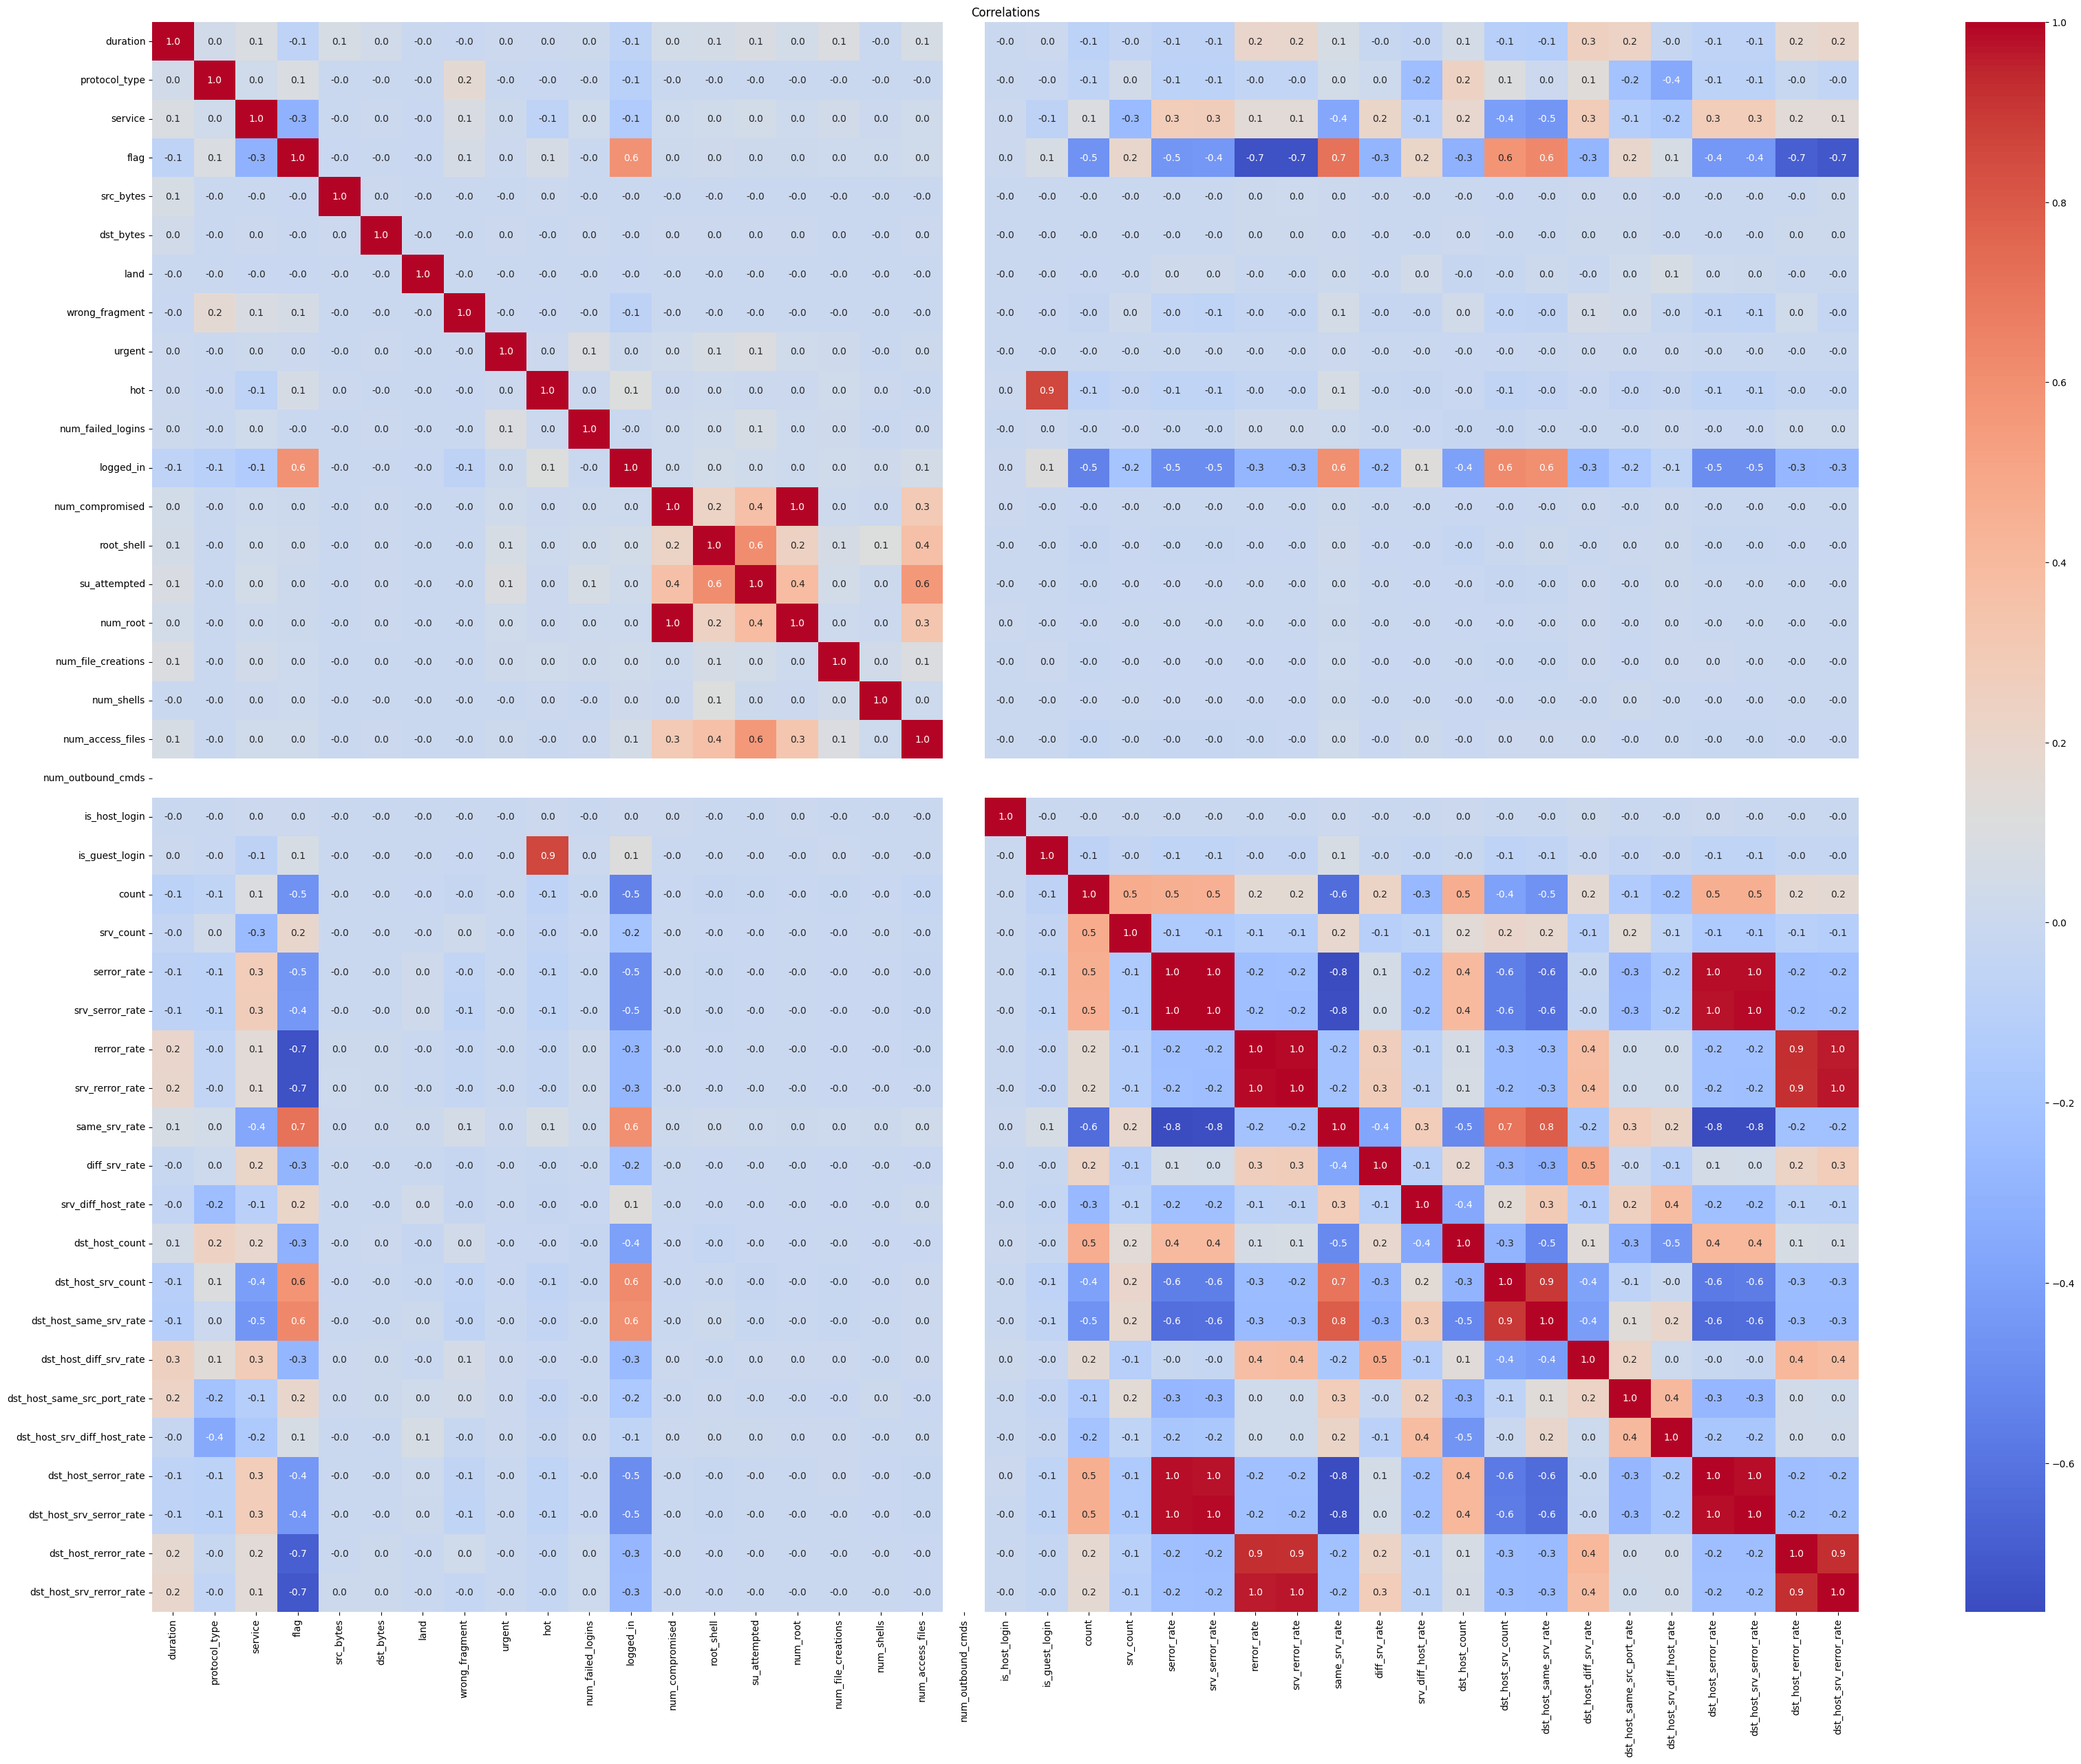

In [53]:
plt.figure(figsize=(40, 30))
sns.heatmap(df_x.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

# Comments on the correlation map
  There some strong correlations we might need a mask for values above a threshold excluding the self correlation ofc and the question is what threshold to choose

  # Remove highly correlated features (>0.7) to avoid redundancy,
# reduce overfitting, and improve model stability/interpretability

In [54]:
# lets see num_outbound_cmds and is_host_login
df_x[['num_outbound_cmds']].value_counts()
# it consists only 0
df_x['is_host_login'].value_counts()
# it consists of only 1 value as 1 and all the rest as 0

# lets drop this both columns as they have no role in the decision as they are all same
df_x.drop(columns=['num_outbound_cmds', 'is_host_login'], inplace=True)
df_x



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17000000,0.03000000,0.17000000,0.00000000,0.00000000,0.00000000,0.05000000,0.00000000
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00000000,0.60000000,0.88000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10000000,0.05000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00000000,0.00000000,0.03000000,0.04000000,0.03000000,0.01000000,0.00000000,0.01000000
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10000000,0.06000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96000000,0.01000000,0.01000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
125970,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12000000,0.06000000,0.00000000,0.00000000,0.72000000,0.00000000,0.01000000,0.00000000
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03000000,0.05000000,0.00000000,0.00000000,1.00000000,1.00000000,0.00000000,0.00000000


In [56]:
# return all the columns names there are
df_x.columns
df_x.shape

(125973, 39)

Index(['flag', 'hot', 'num_compromised', 'num_root', 'is_guest_login',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


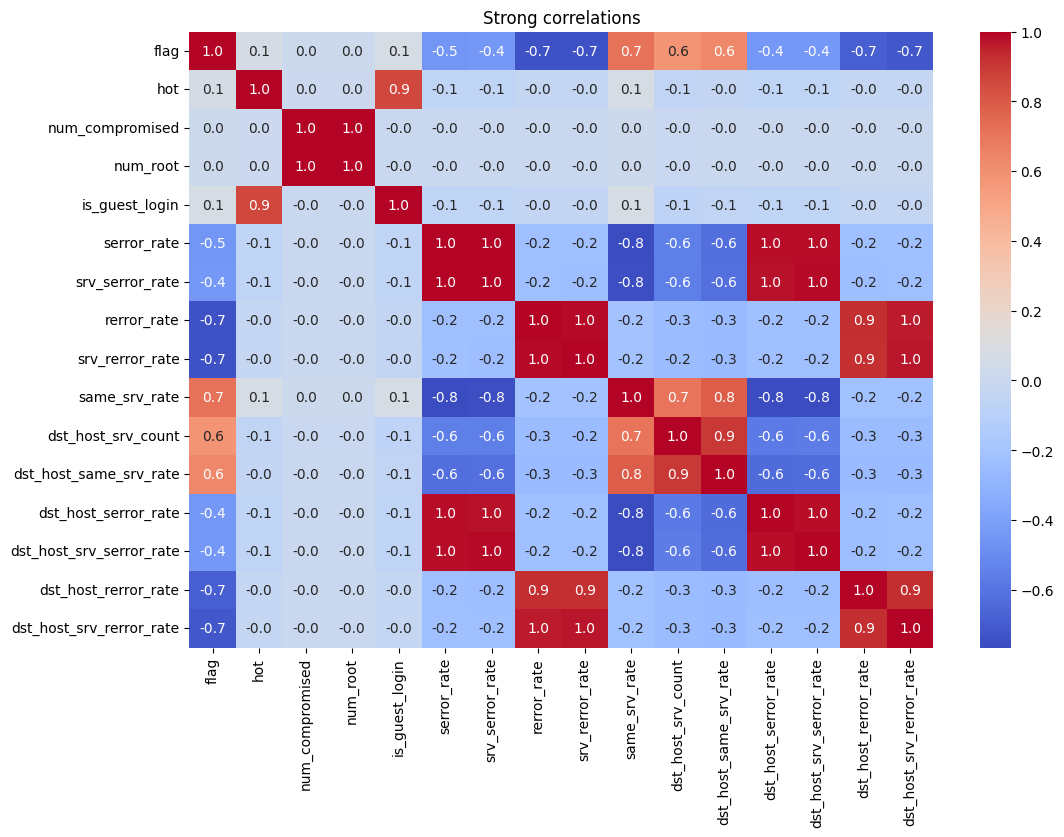

In [57]:
# only strong correlations
corr_matrix = df_x.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

This gives us a clean view.

In [58]:
# lets decide to manually remove columns with correlation 1:1
df_train = df_x.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate'], axis=1)


In [59]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate'],
      dtype='object')

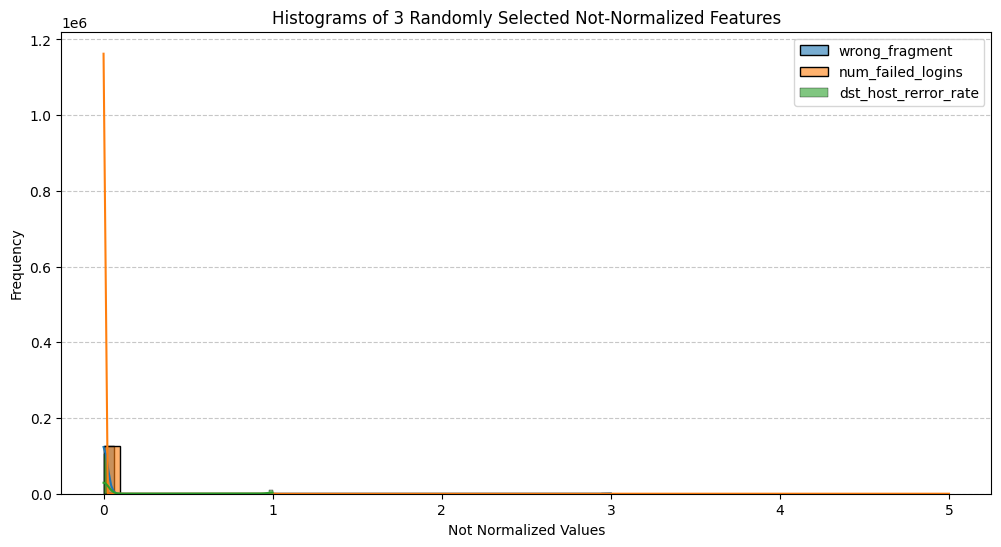

In [69]:
random_columns = df_train.sample(n=3, axis=1).columns # random_state for reproducibility


plt.figure(figsize=(12, 6))
for col in random_columns:
    sns.histplot(df_train[col], bins=50, kde=True, edgecolor="black", label=col, alpha=0.6)

plt.legend()
plt.title("Histograms of 3 Randomly Selected Not-Normalized Features")
plt.xlabel("Not Normalized Values")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This cell chooses random variables every runtime
# it helps us understand that the spread of data is random and some range from 0 - 400 meanwhile some 0-1

VISUALIZATION EXPLORATION

In [64]:
# lets scale shall we
# literature review why choose Robust Scaler ? cause we have ouliers and we want to be immune to iti
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_SCALED = scaler.fit_transform(df_train)

In [67]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,1.00000000,0.00000000,0.00000000,150,25,0.17000000,0.03000000,0.17000000,0.00000000,0.05000000
1,0,2,44,9,146,0,0,0,0,0,...,0.08000000,0.15000000,0.00000000,255,1,0.00000000,0.60000000,0.88000000,0.00000000,0.00000000
2,0,1,49,5,0,0,0,0,0,0,...,0.05000000,0.07000000,0.00000000,255,26,0.10000000,0.05000000,0.00000000,0.00000000,0.00000000
3,0,1,24,9,232,8153,0,0,0,0,...,1.00000000,0.00000000,0.00000000,30,255,1.00000000,0.00000000,0.03000000,0.04000000,0.00000000
4,0,1,24,9,199,420,0,0,0,0,...,1.00000000,0.00000000,0.09000000,255,255,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000


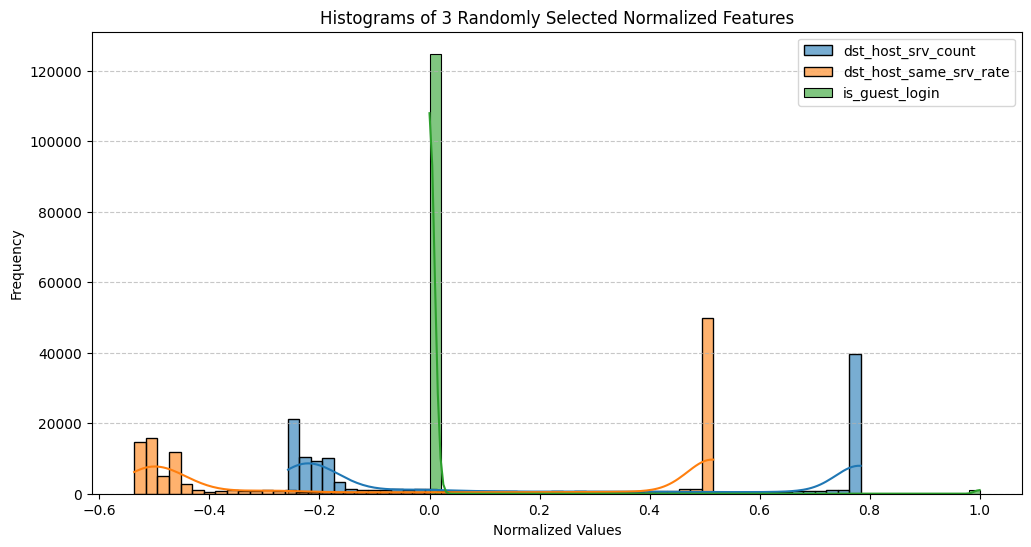

In [76]:
X_scaled_df = pd.DataFrame(X_SCALED, columns=df_train.columns)
random_columns = df_train.sample(n=3, axis=1).columns # random_state for reproducibility


plt.figure(figsize=(12, 6))
for col in random_columns:
    sns.histplot(X_scaled_df[col], bins=50, kde=True, edgecolor="black", label=col, alpha=0.6)

plt.legend()
plt.title("Histograms of 3 Randomly Selected Normalized Features")
plt.xlabel("Normalized Values")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
# Scaling done !!
# wait does that mean i scaled the label encodiing too ?
X_scaled_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,0.00000000,0.00000000,-0.13793103,0.00000000,1.61956522,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,-0.60693642,-0.15510204,-0.35789474,0.14285714,2.83333333,0.00000000,0.05000000
1,0.00000000,1.00000000,0.68965517,0.00000000,0.36956522,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,-1.01098901,2.50000000,0.00000000,0.00000000,-0.25306122,-0.53684211,8.28571429,14.66666667,0.00000000,0.00000000
2,0.00000000,0.00000000,0.86206897,-1.00000000,-0.15942029,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,-1.04395604,1.16666667,0.00000000,0.00000000,-0.15102041,-0.43157895,0.42857143,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,0.00000000,0.68115942,15.80038760,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,-1.30057803,0.78367347,0.51578947,-0.28571429,0.50000000,2.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,0.56159420,0.81395349,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.09000000,0.00000000,0.78367347,0.51578947,-0.28571429,0.00000000,0.00000000,0.00000000


In [82]:
# lets encode label y too
df_y.head()
# we need only one variable and that is attack_group as it is a dependent varaiable
df_y_test = df_y['attack_group'].copy()
df_y_test.head()
# there is no need to scale if there is only oone variable

,attack_group
0,1
1,1
2,0
3,1
4,1


In [87]:
#our independt and dependent variable
X_scaled = X_SCALED
y = df_y_test

In [88]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
models, feature_importances, val_metrics = [], [], []
fold = 0

for train_idx, val_idx in kf.split(X_scaled):
    print(f"===== Evaluation of fold {fold} starts =====")

    # Split the scaled features and target arrays
    X_train_, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train_, y_val = y.values[train_idx], y.values[val_idx]  # y can be a Series or np.array

    # Train the Random Forest
    rfc = RandomForestClassifier(n_estimators=500, random_state=42)
    rfc.fit(X_train_, y_train_)


    models.append(rfc)
    feature_importances.append(rfc.feature_importances_)

    # Predict and evaluate
    y_val_pred = rfc.predict(X_val)

    metrics_mac = list(precision_recall_fscore_support(y_val, y_val_pred, average='macro')[:3])
    metrics_mic = list(precision_recall_fscore_support(y_val, y_val_pred, average='micro')[:3])
    metrics_wei = list(precision_recall_fscore_support(y_val, y_val_pred, average='weighted')[:3])
    val_metrics.append([metrics_mac, metrics_mic, metrics_wei])

    print(f"===== Classification Report =====\n{classification_report(y_val, y_val_pred)}")
    print(f"===== Evaluation of fold {fold} finishes =====\n")
    fold += 1

===== Evaluation of fold 0 starts =====
===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11773
           1       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

===== Evaluation of fold 0 finishes =====

===== Evaluation of fold 1 starts =====
===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11824
           1       1.00      1.00      1.00     13371

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

===== Evaluation of fold 1 finishes =====

===== Evaluation of fold 2 starts =====
===== Classification Report =====
              precision    recall  f1-

In [91]:
# Summarize the avarage performance in KFold CV
avg_metrics = np.mean(val_metrics, axis=0)
print("=====Average evaluatin metrics over 5 folds=====")
for i, method in enumerate(['Macro', 'Micro', 'Weighted']):
    print(f"=====Metrics {method}=====")
    print(f"Precision = {avg_metrics[i][0]} | Recall = {avg_metrics[i][1]} | F1-score = {avg_metrics[i][2]}")

=====Average evaluatin metrics over 5 folds=====
=====Metrics Macro=====
Precision = 0.9988318125484452 | Recall = 0.9987593229041577 | F1-score = 0.998795244556003
=====Metrics Micro=====
Precision = 0.9988013321447949 | Recall = 0.9988013321447949 | F1-score = 0.9988013321447949
=====Metrics Weighted=====
Precision = 0.9988018875275702 | Recall = 0.9988013321447949 | F1-score = 0.9988012895527623


FEATURE IMPORTANCE

In [94]:
import plotly.graph_objects as go
# got introduced to plotly.graph it is cool

# Assuming 'models' contains your trained RandomForestClassifier models
# and 'df_train' is the DataFrame used for training, containing the feature names.

fi = []
# Assuming 'models' is a list of trained RandomForestClassifier instances
for rfc_model in models:
    fi.append(rfc_model.feature_importances_)

avg_fi = np.mean(fi, axis=0)

feature_names = df_train.columns # This is the crucial correction

fi_dict = {}
for feature, feature_importance in zip(feature_names, avg_fi):
    fi_dict[feature] = feature_importance

fi_dict = dict(sorted(fi_dict.items(), key=lambda item: item[1], reverse=True))

fig = go.Figure([go.Bar(x=list(fi_dict.keys()), y=list(fi_dict.values()))])
fig.update_layout(title="Feature Importance")
fig.show()

KMEANS CLUSTERING

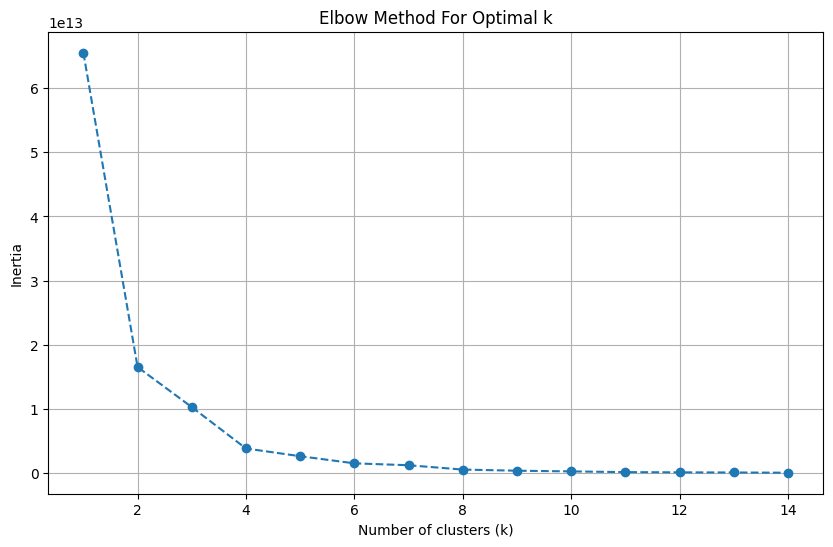

In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



n_clusters_range = range(1, 15) # Example range for k
inertias = []

for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled) # Fit KMeans on your scaled data
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [102]:
# After inspecting the Elbow plot, let's say you choose k=4 as optimal
optimal_k = 4 # Replace with the k you choose from the elbow plot

final_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = final_kmeans_model.fit_predict(X) # Fit and get cluster labels

# You can then add these labels back to your original (or a copy of your original) DataFrame
df['cluster'] = cluster_labels

print(f"Data points clustered into {optimal_k} groups.")
print(df.head())

Data points clustered into 4 groups.
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0               0       0    0  ...                   0.17000000   
1               0       0    0  ...                   0.88000000   
2               0       0    0  ...                   0.00000000   
3               0       0    0  ...                   0.03000000   
4               0       0    0  ...                   0.00000000   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                   0.00000000            0.00000000   
1  

In [103]:
model = KMeans(n_clusters=1, n_init='auto')
train_test_model(model, kmeans=True)

   attack_group  cluster
0             1        0
1             1        0
2             0        0
3             1        0
4             1        0


In [106]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Subsample to speed up
X_sample = resample(X_scaled, n_samples=20000, random_state=42)

k_values = range(2, 6)
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=200)
    labels = kmeans.fit_predict(X_sample)

    sil = silhouette_score(X_sample, labels, sample_size=10000, random_state=42)
    db = davies_bouldin_score(X_sample, labels)
    ch = calinski_harabasz_score(X_sample, labels)

    silhouette_scores.append(sil)
    davies_bouldin_scores.append(db)
    calinski_harabasz_scores.append(ch)

In [107]:
for k, sil, db, ch in zip(k_values, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores):
    print(f"k = {k}")
    print(f"  Silhouette Score       : {sil:.4f}")
    print(f"  Davies-Bouldin Index   : {db:.4f}")
    print(f"  Calinski-Harabasz Index: {ch:.4f}")
    print("-" * 40)

k = 2
  Silhouette Score       : 0.9997
  Davies-Bouldin Index   : 0.0002
  Calinski-Harabasz Index: 49883.8859
----------------------------------------
k = 3
  Silhouette Score       : 0.9997
  Davies-Bouldin Index   : 0.0002
  Calinski-Harabasz Index: 333661.0424
----------------------------------------
k = 4
  Silhouette Score       : 0.9991
  Davies-Bouldin Index   : 0.0004
  Calinski-Harabasz Index: 1319517.2537
----------------------------------------
k = 5
  Silhouette Score       : 0.9866
  Davies-Bouldin Index   : 0.1527
  Calinski-Harabasz Index: 3100350.6795
----------------------------------------


In [108]:
print("Unique values per feature:\n", pd.DataFrame(X_scaled).nunique())
print("Data shape:", X_scaled.shape)
print("Any duplicates?", pd.DataFrame(X_scaled).duplicated().sum())


Unique values per feature:
 0     2981
1        3
2       70
3       11
4     3341
5     9326
6        2
7        3
8        4
9       28
10       6
11       2
12      88
13       2
14       3
15      35
16       3
17      10
18       2
19     512
20     509
21      89
22      82
23     101
24      95
25      60
26     256
27     256
28     101
29     101
30     101
31      75
32     101
dtype: int64
Data shape: (125973, 33)
Any duplicates? 261


Low-unique (categorical-like): [1, 6, 7, 8, 10, 11, 13, 14, 16, 18]
High-unique (continuous): [0, 2, 3, 4, 5, 9, 12, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [112]:
# This cell is now redundant as X_continuous_scaled_df is correctly prepared in the previous step.
# X_cont = df[high_unique_cols]
# from sklearn.preprocessing import StandardScaler
# X_cont_scaled = StandardScaler().fit_transform(X_cont)


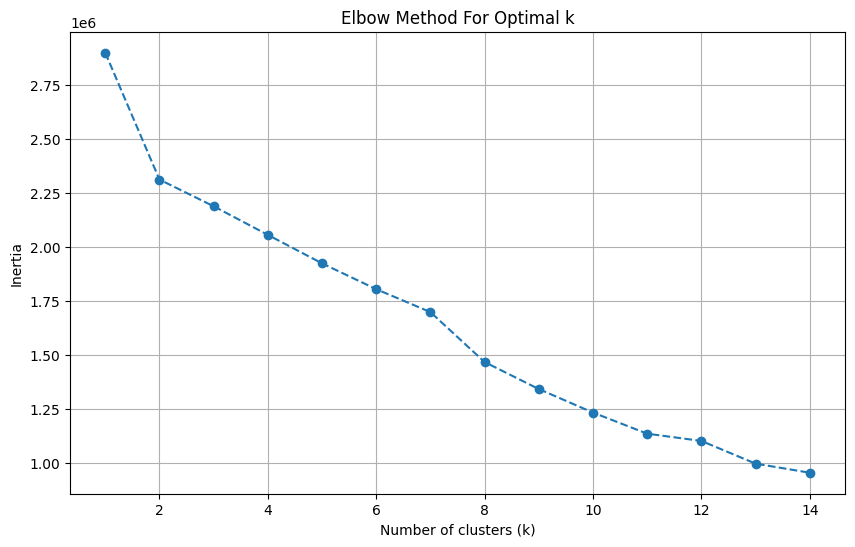

In [115]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



n_clusters_range = range(1, 15) # Example range for k
inertias = []

for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cont_scaled) # Fit KMeans on your scaled data
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()



In [116]:
# After inspecting the Elbow plot, let's say you choose k=4 as optimal
optimal_k = 4 # Replace with the k you choose from the elbow plot

final_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# Fit and get cluster labels from the scaled continuous features DataFrame
cluster_labels = final_kmeans_model.fit_predict(X_continuous_scaled_df)

# Add these labels to X_scaled_df, which has all robust-scaled features and original column names.
X_scaled_df['cluster'] = cluster_labels

print(f"Data points clustered into {optimal_k} groups.")
print(X_scaled_df.head()) # Display head of X_scaled_df which now includes the cluster column

Data points clustered into 4 groups.
           0          1           2           3           4           5  \
0 0.00000000 0.00000000 -0.13793103  0.00000000  1.61956522  0.00000000   
1 0.00000000 1.00000000  0.68965517  0.00000000  0.36956522  0.00000000   
2 0.00000000 0.00000000  0.86206897 -1.00000000 -0.15942029  0.00000000   
3 0.00000000 0.00000000  0.00000000  0.00000000  0.68115942 15.80038760   
4 0.00000000 0.00000000  0.00000000  0.00000000  0.56159420  0.81395349   

           6          7          8          9  ...         24         25  \
0 0.00000000 0.00000000 0.00000000 0.00000000  ... 0.00000000 0.00000000   
1 0.00000000 0.00000000 0.00000000 0.00000000  ... 2.50000000 0.00000000   
2 0.00000000 0.00000000 0.00000000 0.00000000  ... 1.16666667 0.00000000   
3 0.00000000 0.00000000 0.00000000 0.00000000  ... 0.00000000 0.00000000   
4 0.00000000 0.00000000 0.00000000 0.00000000  ... 0.00000000 0.09000000   

           26          27          28          29      

In [117]:
df.groupby('cluster').mean().head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
cluster,,,,,,,,,,,,,,,,,,,,,
0,135.76461342,-0.03715984,0.13454594,-0.16907358,76.92636419,11.21174242,0.00058945,0.01033992,0.00022104,0.57110227,...,-0.00799588,0.15807054,0.25297451,-1.13559922,0.37518952,0.30388338,0.51802731,4.68758391,4.82987032,0.08117030
1,50.23048991,0.02375494,0.53168014,-1.12031139,2.83872802,0.36800637,0.00002029,0.01113703,0.00000000,0.00831727,...,-0.93736342,2.46929709,0.00218278,-0.04864685,-0.20352522,-0.47831882,1.76752496,0.98928897,0.03306623,0.21290577
2,19.77660369,0.19881698,-0.03431938,-0.01062425,34.93083545,6.82762444,0.00000000,0.05421237,0.00011486,0.05274795,...,-0.01088299,0.11065487,0.05315052,-0.12264224,0.63457199,0.38075757,-0.10397814,1.62083405,0.18155975,0.01012979
3,24189.99031690,0.10563380,0.79128218,-1.00066021,14338.99496071,3623.53149054,0.00000000,0.00000000,0.00088028,0.22007042,...,-0.02334197,0.32438380,0.00102993,-0.12459293,-0.23781618,-0.49627502,7.64675553,13.60475352,0.32350352,0.71892606


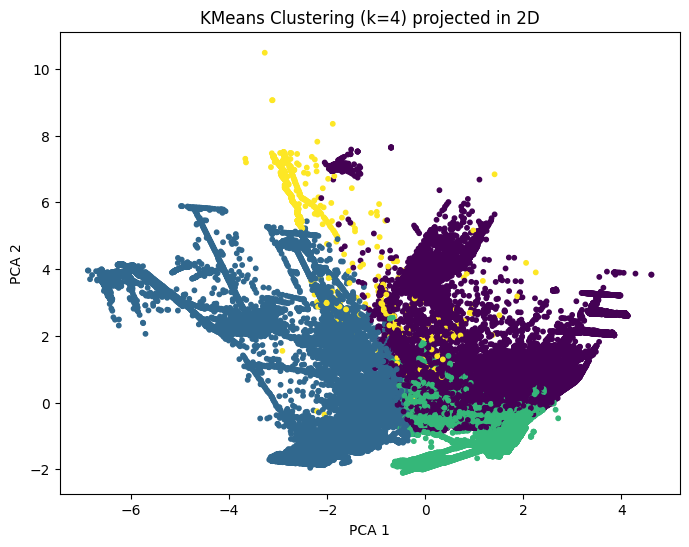

In [118]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_cont_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title(f'KMeans Clustering (k={optimal_k}) projected in 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [119]:
# Basic descriptive stats per cluster
# Use X_scaled_df which now contains the cluster column
summary = X_scaled_df.groupby('cluster')[high_unique_cols_names].mean().round(2)
print(summary)
# Also get value counts for the new 'cluster' column in X_scaled_df
print(X_scaled_df['cluster'].value_counts(normalize=True))


                    0           2           3              4             5   \
cluster                                                                       
0         135.76000000  0.13000000 -0.17000000    76.93000000   11.21000000   
1          50.23000000  0.53000000 -1.12000000     2.84000000    0.37000000   
2          19.78000000 -0.03000000 -0.01000000    34.93000000    6.83000000   
3       24189.99000000  0.79000000 -1.00000000 14338.99000000 3623.53000000   

                9           12         15         17          19  ...  \
cluster                                                           ...   
0       0.57000000  0.04000000 0.00000000 0.00000000 -0.07000000  ...   
1       0.01000000  0.02000000 0.00000000 0.00000000  1.06000000  ...   
2       0.05000000  0.03000000 0.00000000 0.01000000  0.39000000  ...   
3       0.22000000 27.66000000 1.08000000 0.16000000 -0.08000000  ...   

                 23         24         25          26          27          28  \
clust

,proportion
cluster,
1,0.39131401
0,0.32321212
2,0.27645607
3,0.00901781


In [129]:
df.columns = df_x.columns[:33].tolist() + ['cluster']

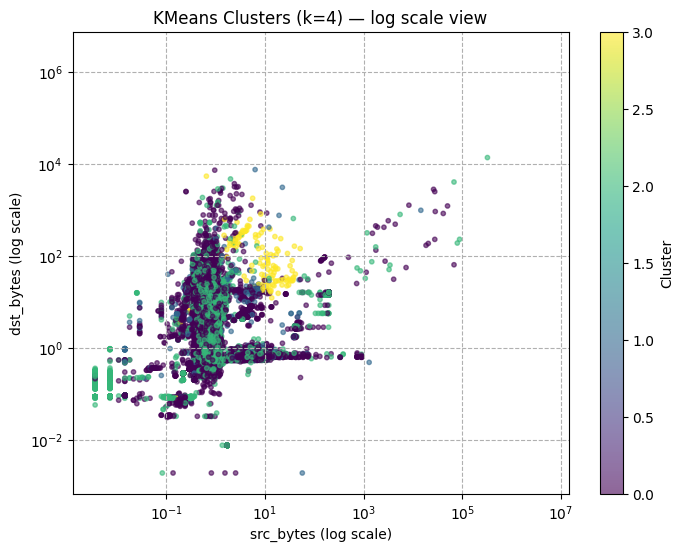

In [131]:
# Just pick the two features you want to visualize
feat_x = "src_bytes"
feat_y = "dst_bytes"

plt.figure(figsize=(8,6))
# Plot using the X_scaled_df DataFrame which now contains the cluster column and original feature names
plt.scatter(X_scaled_df[feat_x], X_scaled_df[feat_y],
            c=X_scaled_df['cluster'], cmap='viridis', s=10, alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(f'{feat_x} (log scale)')
plt.ylabel(f'{feat_y} (log scale)')
plt.title(f"KMeans Clusters (k={optimal_k}) — log scale view on {feat_x} vs {feat_y}")
plt.colorbar(label='Cluster')
plt.grid(True, which='both', ls='--')
plt.show()

In [139]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Re-initialize these lists for a clean run within this cell
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

k_values = range(2, 6) # Ensure k_values is defined, assuming it's still range(2,6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=500)

    labels = kmeans.fit_predict(X_sample) # X_sample must be correctly defined from previous cell

    n_labels = len(np.unique(labels))

    # Debug print to check n_labels before metrics calculation
    print(f"Debug: k={k}, Unique labels found by KMeans: {n_labels}")

    if n_labels < 2:
        print(f"⚠️ k={k}: Only {n_labels} cluster found — skipping metrics calculations.")
        continue

    sil = silhouette_score(X_sample, labels, sample_size=10000, random_state=42)
    db  = davies_bouldin_score(X_sample, labels)
    ch  = calinski_harabasz_score(X_sample, labels)

    silhouette_scores.append(sil)
    davies_bouldin_scores.append(db)
    calinski_harabasz_scores.append(ch)

    print(f"k={k}")
    print(f"  Silhouette Score       : {sil:.4f}")


Debug: k=2, Unique labels found by KMeans: 2


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)